# Day 74 - CI/CD for Machine Learning Pipelines

In this lesson, we'll explore Continuous Integration and Continuous Deployment (CI/CD) practices specifically tailored for machine learning systems. We'll learn how to build robust ML pipelines that ensure code quality, model reliability, and smooth deployment to production.

In [1]:
# Packages required for this lesson
# Uncomment the line below if you need to install packages
# !pip install scikit-learn matplotlib pandas numpy pytest joblib

## Introduction to CI/CD for Machine Learning

### What is CI/CD?

**Continuous Integration (CI)** and **Continuous Deployment (CD)** are software development practices that have become essential in modern machine learning operations (MLOps).

- **Continuous Integration (CI)**: The practice of automatically testing and integrating code changes into a shared repository frequently. Every commit triggers an automated build and test process.

- **Continuous Deployment (CD)**: The practice of automatically deploying code changes that pass all tests to production environments.

### Why CI/CD Matters for Machine Learning

Machine learning systems have unique challenges compared to traditional software:

1. **Code + Data + Model**: Unlike traditional software that only has code, ML systems depend on code, data, and trained models. All three must be versioned and tested.

2. **Non-Deterministic Behavior**: ML models can produce different results even with the same code if the data or random seeds change.

3. **Gradual Performance Degradation**: Models can degrade over time as real-world data distributions shift (concept drift).

4. **Computational Complexity**: Training and testing ML models requires significant computational resources.

5. **Multiple Stakeholders**: Data scientists, ML engineers, and DevOps teams need to collaborate effectively.

### Benefits of CI/CD for ML

- **Faster Iteration**: Quickly test and deploy model improvements
- **Quality Assurance**: Automated testing catches bugs and regressions early
- **Reproducibility**: Versioned pipelines ensure experiments can be reproduced
- **Collaboration**: Teams can work on different components simultaneously
- **Reliability**: Automated deployment reduces human error

## Components of an ML Pipeline

A typical machine learning pipeline consists of several interconnected stages:

### 1. Data Pipeline
- **Data Collection**: Gathering raw data from various sources
- **Data Validation**: Checking data quality, schema, and distributions
- **Data Preprocessing**: Cleaning, transforming, and feature engineering

### 2. Model Pipeline
- **Model Training**: Training algorithms on prepared data
- **Model Validation**: Evaluating model performance on held-out data
- **Model Testing**: Running comprehensive tests on model behavior

### 3. Deployment Pipeline
- **Model Packaging**: Creating deployable artifacts
- **Integration Testing**: Testing the model in a staging environment
- **Production Deployment**: Deploying to production with monitoring

### 4. Monitoring Pipeline
- **Performance Monitoring**: Tracking model accuracy and latency
- **Data Drift Detection**: Identifying changes in input distributions
- **Alert Management**: Notifying teams of issues

Let's visualize this pipeline structure:

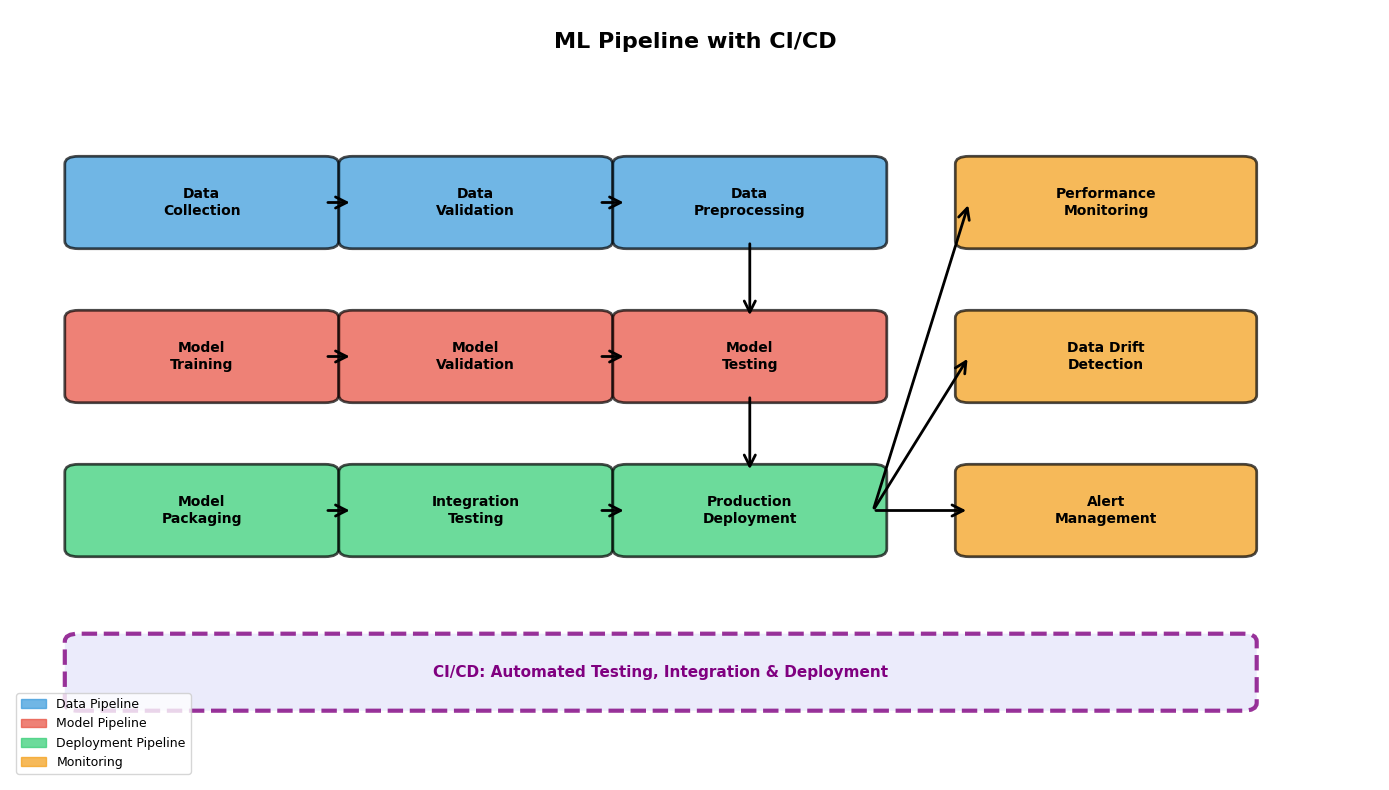


Pipeline Structure Overview:
1. Data Pipeline: Collect → Validate → Preprocess
2. Model Pipeline: Train → Validate → Test
3. Deployment Pipeline: Package → Test → Deploy
4. Monitoring: Track performance, detect drift, manage alerts


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Define colors
color_data = '#3498db'
color_model = '#e74c3c'
color_deploy = '#2ecc71'
color_monitor = '#f39c12'

# Helper function to create boxes
def create_box(ax, x, y, width, height, text, color):
    box = FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.1",
                          edgecolor='black', facecolor=color, alpha=0.7, linewidth=2)
    ax.add_patch(box)
    ax.text(x + width/2, y + height/2, text, ha='center', va='center',
            fontsize=10, fontweight='bold', wrap=True)

# Helper function to create arrows
def create_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2), arrowstyle='->',
                           mutation_scale=20, linewidth=2, color='black')
    ax.add_patch(arrow)

# Title
ax.text(5, 9.5, 'ML Pipeline with CI/CD', ha='center', fontsize=16, fontweight='bold')

# Stage 1: Data Pipeline
create_box(ax, 0.5, 7, 1.8, 1, 'Data\nCollection', color_data)
create_box(ax, 2.5, 7, 1.8, 1, 'Data\nValidation', color_data)
create_box(ax, 4.5, 7, 1.8, 1, 'Data\nPreprocessing', color_data)

create_arrow(ax, 2.3, 7.5, 2.5, 7.5)
create_arrow(ax, 4.3, 7.5, 4.5, 7.5)

# Stage 2: Model Pipeline
create_box(ax, 0.5, 5, 1.8, 1, 'Model\nTraining', color_model)
create_box(ax, 2.5, 5, 1.8, 1, 'Model\nValidation', color_model)
create_box(ax, 4.5, 5, 1.8, 1, 'Model\nTesting', color_model)

create_arrow(ax, 2.3, 5.5, 2.5, 5.5)
create_arrow(ax, 4.3, 5.5, 4.5, 5.5)

# Connect data to model pipeline
create_arrow(ax, 5.4, 7, 5.4, 6)

# Stage 3: Deployment Pipeline
create_box(ax, 0.5, 3, 1.8, 1, 'Model\nPackaging', color_deploy)
create_box(ax, 2.5, 3, 1.8, 1, 'Integration\nTesting', color_deploy)
create_box(ax, 4.5, 3, 1.8, 1, 'Production\nDeployment', color_deploy)

create_arrow(ax, 2.3, 3.5, 2.5, 3.5)
create_arrow(ax, 4.3, 3.5, 4.5, 3.5)

# Connect model to deployment pipeline
create_arrow(ax, 5.4, 5, 5.4, 4)

# Stage 4: Monitoring
create_box(ax, 7, 7, 2, 1, 'Performance\nMonitoring', color_monitor)
create_box(ax, 7, 5, 2, 1, 'Data Drift\nDetection', color_monitor)
create_box(ax, 7, 3, 2, 1, 'Alert\nManagement', color_monitor)

# Connect deployment to monitoring
create_arrow(ax, 6.3, 3.5, 7, 3.5)
create_arrow(ax, 6.3, 3.5, 7, 5.5)
create_arrow(ax, 6.3, 3.5, 7, 7.5)

# CI/CD Annotation
ci_cd_box = FancyBboxPatch((0.5, 1), 8.5, 0.8, boxstyle="round,pad=0.1",
                           edgecolor='purple', facecolor='lavender',
                           alpha=0.8, linewidth=3, linestyle='--')
ax.add_patch(ci_cd_box)
ax.text(4.75, 1.4, 'CI/CD: Automated Testing, Integration & Deployment',
        ha='center', va='center', fontsize=11, fontweight='bold', color='purple')

# Legend
data_patch = mpatches.Patch(color=color_data, label='Data Pipeline', alpha=0.7)
model_patch = mpatches.Patch(color=color_model, label='Model Pipeline', alpha=0.7)
deploy_patch = mpatches.Patch(color=color_deploy, label='Deployment Pipeline', alpha=0.7)
monitor_patch = mpatches.Patch(color=color_monitor, label='Monitoring', alpha=0.7)

ax.legend(handles=[data_patch, model_patch, deploy_patch, monitor_patch],
          loc='lower left', fontsize=9)

plt.tight_layout()
plt.show()

print("\nPipeline Structure Overview:")
print("=" * 60)
print("1. Data Pipeline: Collect → Validate → Preprocess")
print("2. Model Pipeline: Train → Validate → Test")
print("3. Deployment Pipeline: Package → Test → Deploy")
print("4. Monitoring: Track performance, detect drift, manage alerts")
print("=" * 60)

## Testing Strategies for Machine Learning

Testing ML systems requires different approaches than traditional software testing. We need to test not just the code, but also the data and the model.

### Types of Tests for ML Systems

#### 1. **Unit Tests**
Test individual functions and components in isolation.

```python
def test_preprocess_function():
    input_data = [1, 2, 3, None, 5]
    result = preprocess(input_data)
    assert len(result) == 4  # None should be removed
    assert all(isinstance(x, (int, float)) for x in result)
```

#### 2. **Integration Tests**
Test how components work together.

```python
def test_training_pipeline():
    data = load_data()
    processed_data = preprocess(data)
    model = train_model(processed_data)
    assert model is not None
    assert hasattr(model, 'predict')
```

#### 3. **Data Validation Tests**
Verify data quality and schema.

```python
def test_data_schema():
    df = load_data()
    assert 'target' in df.columns
    assert df['target'].dtype == 'int64'
    assert df['feature1'].min() >= 0
```

#### 4. **Model Validation Tests**
Ensure model meets performance requirements.

```python
def test_model_accuracy():
    model = load_model()
    X_test, y_test = load_test_data()
    accuracy = model.score(X_test, y_test)
    assert accuracy >= 0.85  # Minimum acceptable accuracy
```

#### 5. **Behavioral Tests**
Test model behavior on specific scenarios.

```python
def test_model_invariance():
    model = load_model()
    # Model should be invariant to feature order
    result1 = model.predict([feature_a, feature_b])
    result2 = model.predict([feature_b, feature_a])
    assert result1 == result2
```

### Mathematical Foundation: Test Coverage and Validation

#### Test Coverage Metric

Test coverage measures how much of your code is executed during testing:

$$\text{Coverage} = \frac{\text{Lines of Code Executed}}{\text{Total Lines of Code}} \times 100\%$$

For ML systems, we extend this to include:

$$\text{ML Coverage} = \alpha \cdot C_{\text{code}} + \beta \cdot C_{\text{data}} + \gamma \cdot C_{\text{model}}$$

where:
- $C_{\text{code}}$ = Code coverage
- $C_{\text{data}}$ = Data validation coverage
- $C_{\text{model}}$ = Model test coverage
- $\alpha, \beta, \gamma$ = Weights (typically $\alpha = \beta = \gamma = \frac{1}{3}$)

#### Validation Threshold

For model deployment, we use a threshold-based decision:

$$\text{Deploy} = \begin{cases}
\text{True} & \text{if } A_{\text{new}} > A_{\text{min}} \text{ and } A_{\text{new}} > A_{\text{current}} - \epsilon \\
\text{False} & \text{otherwise}
\end{cases}$$

where:
- $A_{\text{new}}$ = Accuracy of new model
- $A_{\text{min}}$ = Minimum acceptable accuracy
- $A_{\text{current}}$ = Current production model accuracy
- $\epsilon$ = Acceptable degradation threshold

## Practical Implementation

Let's implement a complete CI/CD pipeline for a simple machine learning project. We'll build it step by step.

### Step 1: Data Validation Module

In [3]:
import numpy as np
import pandas as pd
from typing import Tuple, Dict
import warnings
warnings.filterwarnings('ignore')

class DataValidator:
    """
    Data validation class for ML pipelines.
    Ensures data quality and schema compliance.
    """

    def __init__(self, schema: Dict):
        self.schema = schema
        self.validation_results = {}

    def validate_schema(self, df: pd.DataFrame) -> bool:
        """Validate that dataframe matches expected schema."""
        print("\n" + "="*60)
        print("VALIDATING DATA SCHEMA")
        print("="*60)

        # Check columns
        expected_columns = set(self.schema['columns'])
        actual_columns = set(df.columns)

        missing_columns = expected_columns - actual_columns
        extra_columns = actual_columns - expected_columns

        if missing_columns:
            print(f"❌ Missing columns: {missing_columns}")
            return False

        if extra_columns:
            print(f"⚠️  Extra columns (will be ignored): {extra_columns}")

        print("✓ Column names match schema")

        # Check data types
        for col, expected_dtype in self.schema['dtypes'].items():
            actual_dtype = df[col].dtype
            if actual_dtype != expected_dtype:
                print(f"❌ Column '{col}' has wrong dtype: {actual_dtype} (expected {expected_dtype})")
                return False

        print("✓ Data types match schema")

        # Check value ranges
        for col, (min_val, max_val) in self.schema['ranges'].items():
            if df[col].min() < min_val or df[col].max() > max_val:
                print(f"❌ Column '{col}' has values outside valid range [{min_val}, {max_val}]")
                return False

        print("✓ Value ranges are valid")
        print("="*60)
        print("✅ SCHEMA VALIDATION PASSED")
        print("="*60)
        return True

    def validate_quality(self, df: pd.DataFrame, max_missing_pct: float = 0.1) -> bool:
        """Validate data quality metrics."""
        print("\n" + "="*60)
        print("VALIDATING DATA QUALITY")
        print("="*60)

        # Check for missing values
        missing_pct = df.isnull().sum() / len(df)
        problematic_cols = missing_pct[missing_pct > max_missing_pct]

        if len(problematic_cols) > 0:
            print(f"❌ Columns with too many missing values:")
            for col, pct in problematic_cols.items():
                print(f"   {col}: {pct*100:.2f}%")
            return False

        print(f"✓ Missing values within threshold ({max_missing_pct*100}%)")

        # Check for duplicates
        n_duplicates = df.duplicated().sum()
        dup_pct = n_duplicates / len(df) * 100
        print(f"✓ Duplicate rows: {n_duplicates} ({dup_pct:.2f}%)")

        # Statistical checks
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        print(f"\n✓ Statistical Summary:")
        print(f"  - Total rows: {len(df)}")
        print(f"  - Numeric columns: {len(numeric_cols)}")
        print(f"  - Missing values: {df.isnull().sum().sum()} total")

        print("="*60)
        print("✅ QUALITY VALIDATION PASSED")
        print("="*60)
        return True

# Example usage
print("Data Validator Implementation Complete!")
print("\nThis class will be used in our CI/CD pipeline to ensure data quality.")

Data Validator Implementation Complete!

This class will be used in our CI/CD pipeline to ensure data quality.


### Step 2: Model Training Module

Now let's create a model training module with built-in validation and testing.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
import joblib
from datetime import datetime

class MLModelPipeline:
    """
    Machine Learning pipeline with built-in testing and validation.
    """

    def __init__(self, model_name: str = "random_forest", random_state: int = 42):
        self.model_name = model_name
        self.random_state = random_state
        self.model = None
        self.metrics = {}
        self.trained_at = None

    def train(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        """Train the model with cross-validation."""
        print("\n" + "="*60)
        print(f"TRAINING {self.model_name.upper()} MODEL")
        print("="*60)

        # Initialize model
        self.model = RandomForestClassifier(
            n_estimators=100,
            random_state=self.random_state,
            n_jobs=-1
        )

        # Cross-validation during training
        print("\nPerforming 5-fold cross-validation...")
        cv_scores = cross_val_score(self.model, X_train, y_train, cv=5, scoring='accuracy')

        print(f"Cross-validation scores: {cv_scores}")
        print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

        # Train final model
        print("\nTraining final model on full training set...")
        self.model.fit(X_train, y_train)
        self.trained_at = datetime.now()

        # Training metrics
        train_pred = self.model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        print(f"Training accuracy: {train_accuracy:.4f}")

        self.metrics['cv_mean'] = cv_scores.mean()
        self.metrics['cv_std'] = cv_scores.std()
        self.metrics['train_accuracy'] = train_accuracy

        print("="*60)
        print("✅ MODEL TRAINING COMPLETE")
        print("="*60)

    def validate(self, X_val: np.ndarray, y_val: np.ndarray,
                 min_accuracy: float = 0.80) -> bool:
        """Validate model performance against thresholds."""
        print("\n" + "="*60)
        print("VALIDATING MODEL PERFORMANCE")
        print("="*60)

        if self.model is None:
            print("❌ Model not trained yet!")
            return False

        # Make predictions
        y_pred = self.model.predict(X_val)

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Store metrics
        self.metrics.update({
            'val_accuracy': accuracy,
            'val_precision': precision,
            'val_recall': recall,
            'val_f1': f1
        })

        # Print results
        print(f"\nValidation Metrics:")
        print(f"  Accuracy:  {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall:    {recall:.4f}")
        print(f"  F1-Score:  {f1:.4f}")

        # Check against threshold
        print(f"\nThreshold Check:")
        print(f"  Minimum required accuracy: {min_accuracy:.4f}")
        print(f"  Achieved accuracy: {accuracy:.4f}")

        passed = accuracy >= min_accuracy

        if passed:
            print("="*60)
            print("✅ VALIDATION PASSED - Model meets requirements")
            print("="*60)
        else:
            print("="*60)
            print("❌ VALIDATION FAILED - Model below threshold")
            print("="*60)

        return passed

    def save_model(self, filepath: str) -> None:
        """Save model to disk."""
        if self.model is None:
            raise ValueError("No model to save!")

        model_data = {
            'model': self.model,
            'metrics': self.metrics,
            'trained_at': self.trained_at,
            'model_name': self.model_name
        }

        joblib.dump(model_data, filepath)
        print(f"\n✓ Model saved to: {filepath}")

print("ML Model Pipeline Implementation Complete!")

ML Model Pipeline Implementation Complete!


### Step 3: Complete CI/CD Pipeline

Now let's put it all together in a complete CI/CD pipeline.

In [5]:
class CICDPipeline:
    """
    Complete CI/CD pipeline for ML model deployment.
    """

    def __init__(self, config: Dict):
        self.config = config
        self.data_validator = None
        self.model_pipeline = None
        self.pipeline_status = {
            'data_validation': False,
            'model_training': False,
            'model_validation': False,
            'deployment_ready': False
        }

    def run(self, X: np.ndarray, y: np.ndarray) -> bool:
        """Execute the complete CI/CD pipeline."""
        print("\n" + "="*70)
        print(" "*20 + "CI/CD PIPELINE EXECUTION")
        print("="*70)
        print(f"Pipeline Configuration:")
        print(f"  - Minimum Accuracy: {self.config['min_accuracy']}")
        print(f"  - Test Size: {self.config['test_size']}")
        print(f"  - Random State: {self.config['random_state']}")
        print("="*70)

        try:
            # Step 1: Data Validation
            print("\n[STEP 1/4] Data Validation Phase")
            df = pd.DataFrame(X)
            df['target'] = y

            # Create schema
            schema = {
                'columns': list(df.columns),
                'dtypes': {col: df[col].dtype for col in df.columns},
                'ranges': {col: (df[col].min() - 1, df[col].max() + 1)
                          for col in df.columns if col != 'target'}
            }
            schema['ranges']['target'] = (0, 1)

            self.data_validator = DataValidator(schema)

            if not self.data_validator.validate_schema(df):
                raise ValueError("Data schema validation failed!")

            if not self.data_validator.validate_quality(df):
                raise ValueError("Data quality validation failed!")

            self.pipeline_status['data_validation'] = True

            # Step 2: Split Data
            print("\n[STEP 2/4] Data Splitting Phase")
            X_train, X_test, y_train, y_test = train_test_split(
                X, y,
                test_size=self.config['test_size'],
                random_state=self.config['random_state']
            )
            print(f"✓ Training set: {len(X_train)} samples")
            print(f"✓ Test set: {len(X_test)} samples")

            # Step 3: Model Training
            print("\n[STEP 3/4] Model Training Phase")
            self.model_pipeline = MLModelPipeline(
                model_name="RandomForest",
                random_state=self.config['random_state']
            )
            self.model_pipeline.train(X_train, y_train)
            self.pipeline_status['model_training'] = True

            # Step 4: Model Validation
            print("\n[STEP 4/4] Model Validation Phase")
            validation_passed = self.model_pipeline.validate(
                X_test, y_test,
                min_accuracy=self.config['min_accuracy']
            )

            if not validation_passed:
                raise ValueError("Model validation failed!")

            self.pipeline_status['model_validation'] = True
            self.pipeline_status['deployment_ready'] = True

            # Final Report
            print("\n" + "="*70)
            print(" "*25 + "PIPELINE SUMMARY")
            print("="*70)
            print("Stage Status:")
            for stage, status in self.pipeline_status.items():
                status_icon = "✅" if status else "❌"
                print(f"  {status_icon} {stage.replace('_', ' ').title()}")

            print("\nModel Metrics:")
            for metric, value in self.model_pipeline.metrics.items():
                print(f"  {metric}: {value:.4f}")

            print("="*70)
            print(" "*20 + "🎉 PIPELINE COMPLETED SUCCESSFULLY 🎉")
            print("="*70)

            return True

        except Exception as e:
            print("\n" + "="*70)
            print(" "*25 + "PIPELINE FAILED")
            print("="*70)
            print(f"❌ Error: {str(e)}")
            print("\nStage Status:")
            for stage, status in self.pipeline_status.items():
                status_icon = "✅" if status else "❌"
                print(f"  {status_icon} {stage.replace('_', ' ').title()}")
            print("="*70)
            return False

print("Complete CI/CD Pipeline Implementation Ready!")

Complete CI/CD Pipeline Implementation Ready!


### Step 4: Execute the CI/CD Pipeline

Let's run our complete CI/CD pipeline on a sample dataset.

In [6]:
# Generate sample data for demonstration
print("Generating sample dataset...")
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42,
    flip_y=0.1  # Add some noise
)

print(f"Dataset shape: {X.shape}")
print(f"Target distribution: {np.bincount(y)}")

# Configure pipeline
pipeline_config = {
    'min_accuracy': 0.80,  # Minimum acceptable accuracy
    'test_size': 0.2,       # 20% for testing
    'random_state': 42
}

# Initialize and run pipeline
pipeline = CICDPipeline(config=pipeline_config)
success = pipeline.run(X, y)

if success:
    print("\n✅ Model is ready for deployment!")
else:
    print("\n❌ Pipeline failed. Review logs and fix issues.")

Generating sample dataset...
Dataset shape: (1000, 20)
Target distribution: [491 509]

                    CI/CD PIPELINE EXECUTION
Pipeline Configuration:
  - Minimum Accuracy: 0.8
  - Test Size: 0.2
  - Random State: 42

[STEP 1/4] Data Validation Phase

VALIDATING DATA SCHEMA
✓ Column names match schema
✓ Data types match schema
✓ Value ranges are valid
✅ SCHEMA VALIDATION PASSED

VALIDATING DATA QUALITY
✓ Missing values within threshold (10.0%)
✓ Duplicate rows: 0 (0.00%)

✓ Statistical Summary:
  - Total rows: 1000
  - Numeric columns: 21
  - Missing values: 0 total
✅ QUALITY VALIDATION PASSED

[STEP 2/4] Data Splitting Phase
✓ Training set: 800 samples
✓ Test set: 200 samples

[STEP 3/4] Model Training Phase

TRAINING RANDOMFOREST MODEL

Performing 5-fold cross-validation...


Cross-validation scores: [0.88125 0.85    0.8875  0.85    0.88125]
Mean CV accuracy: 0.8700 (+/- 0.0330)

Training final model on full training set...


Training accuracy: 1.0000
✅ MODEL TRAINING COMPLETE

[STEP 4/4] Model Validation Phase

VALIDATING MODEL PERFORMANCE

Validation Metrics:
  Accuracy:  0.8500
  Precision: 0.8507
  Recall:    0.8500
  F1-Score:  0.8500

Threshold Check:
  Minimum required accuracy: 0.8000
  Achieved accuracy: 0.8500
✅ VALIDATION PASSED - Model meets requirements

                         PIPELINE SUMMARY
Stage Status:
  ✅ Data Validation
  ✅ Model Training
  ✅ Model Validation
  ✅ Deployment Ready

Model Metrics:
  cv_mean: 0.8700
  cv_std: 0.0165
  train_accuracy: 1.0000
  val_accuracy: 0.8500
  val_precision: 0.8507
  val_recall: 0.8500
  val_f1: 0.8500
                    🎉 PIPELINE COMPLETED SUCCESSFULLY 🎉

✅ Model is ready for deployment!


## Visualizing Pipeline Performance

Let's visualize the performance metrics from our CI/CD pipeline.

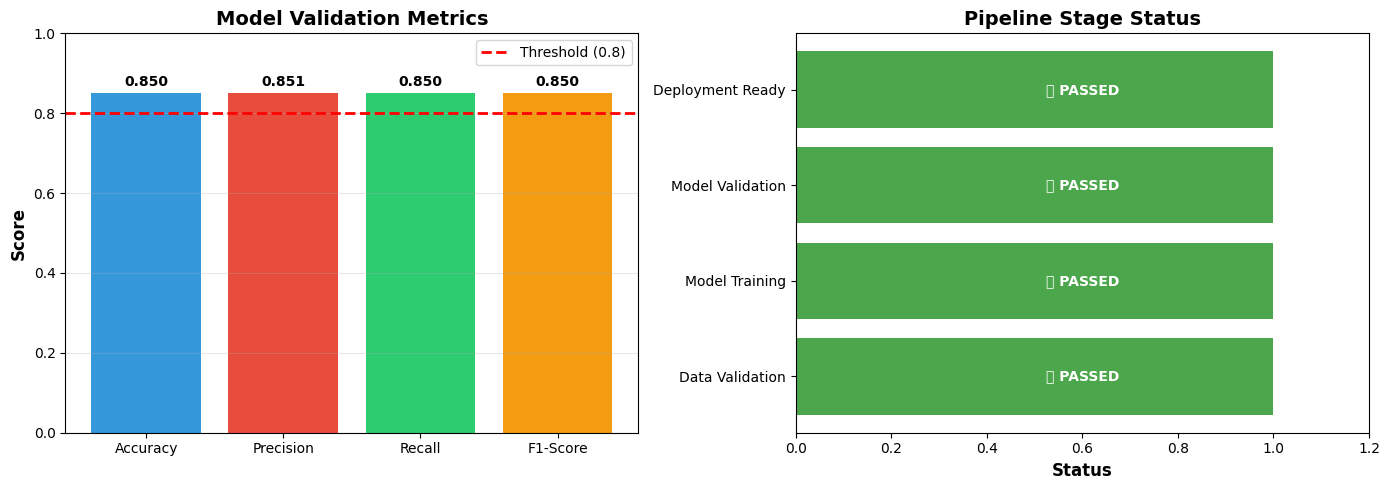


Pipeline Visualization Complete


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract metrics
metrics = pipeline.model_pipeline.metrics

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Validation Metrics Comparison
ax1 = axes[0]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_values = [
    metrics['val_accuracy'],
    metrics['val_precision'],
    metrics['val_recall'],
    metrics['val_f1']
]

bars = ax1.bar(metric_names, metric_values, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
ax1.axhline(y=pipeline_config['min_accuracy'], color='red', linestyle='--',
            linewidth=2, label=f"Threshold ({pipeline_config['min_accuracy']})")
ax1.set_ylim(0, 1.0)
ax1.set_ylabel('Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Validation Metrics', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, metric_values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Pipeline Stage Status
ax2 = axes[1]
stages = list(pipeline.pipeline_status.keys())
statuses = list(pipeline.pipeline_status.values())
colors = ['green' if s else 'red' for s in statuses]

y_pos = np.arange(len(stages))
ax2.barh(y_pos, [1 if s else 0.5 for s in statuses], color=colors, alpha=0.7)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([s.replace('_', ' ').title() for s in stages])
ax2.set_xlabel('Status', fontsize=12, fontweight='bold')
ax2.set_title('Pipeline Stage Status', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 1.2)

# Add status labels
for i, (stage, status) in enumerate(zip(stages, statuses)):
    label = "✅ PASSED" if status else "❌ FAILED"
    ax2.text(0.6, i, label, ha='center', va='center',
             fontweight='bold', fontsize=10, color='white')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Pipeline Visualization Complete")
print("="*60)

## CI/CD Best Practices for Machine Learning

### 1. Version Everything
- **Code**: Use Git for version control
- **Data**: Use data versioning tools (DVC, Pachyderm)
- **Models**: Save model artifacts with version tags
- **Environment**: Pin dependency versions

### 2. Automate Testing
- **Pre-commit hooks**: Run linting and unit tests before commits
- **Pull request checks**: Run full test suite on PRs
- **Scheduled tests**: Run regression tests regularly

### 3. Use Staging Environments
- **Development**: For active development and experimentation
- **Staging**: Mirror of production for final testing
- **Production**: Live environment with monitoring

### 4. Implement Gradual Rollouts
- **Canary Deployment**: Deploy to small percentage of users first
- **Blue-Green Deployment**: Maintain two production environments
- **A/B Testing**: Compare new model against current model

### 5. Monitor Continuously
- **Model Performance**: Track accuracy, latency, throughput
- **Data Drift**: Monitor input distribution changes
- **System Health**: Track resource usage and errors

### 6. Enable Rollback
- **Model Registry**: Keep previous model versions
- **Quick Rollback**: Automate reverting to previous version
- **Incident Response**: Have clear procedures for issues

### Example CI/CD Configuration File (YAML)

```yaml
# .github/workflows/ml-pipeline.yml
name: ML Pipeline CI/CD

on:
  push:
    branches: [ main, develop ]
  pull_request:
    branches: [ main ]

jobs:
  test:
    runs-on: ubuntu-latest
    steps:
      - uses: actions/checkout@v2
      - name: Set up Python
        uses: actions/setup-python@v2
        with:
          python-version: 3.9

      - name: Install dependencies
        run: |
          pip install -r requirements.txt
          pip install pytest

      - name: Run unit tests
        run: pytest tests/unit/

      - name: Run data validation tests
        run: pytest tests/data/

      - name: Run model tests
        run: pytest tests/model/

  deploy:
    needs: test
    runs-on: ubuntu-latest
    if: github.ref == 'refs/heads/main'
    steps:
      - name: Deploy to production
        run: |
          python deploy_model.py --environment production
```

## Hands-On Exercise: Extend the Pipeline

Now it's your turn! Try extending the CI/CD pipeline with additional features:

### Exercise Tasks:

1. **Add Data Drift Detection**
   - Implement a function to compare training and production data distributions
   - Use statistical tests (Kolmogorov-Smirnov test) to detect drift

2. **Implement Model Comparison**
   - Compare new model against current production model
   - Only deploy if new model is significantly better

3. **Add Automated Rollback**
   - Implement logic to automatically rollback if model performance drops
   - Set up alerts for performance degradation

4. **Create Model Report**
   - Generate HTML report with model metrics
   - Include feature importance analysis
   - Add prediction examples

### Starter Code:

Below is a template to get you started on implementing drift detection.

In [8]:
from scipy import stats

class DriftDetector:
    """
    Detect data drift between training and production data.
    """

    def __init__(self, reference_data: np.ndarray, threshold: float = 0.05):
        """
        Initialize drift detector with reference (training) data.

        Parameters:
        -----------
        reference_data : np.ndarray
            Training data to use as reference
        threshold : float
            P-value threshold for drift detection (default: 0.05)
        """
        self.reference_data = reference_data
        self.threshold = threshold
        self.reference_stats = self._compute_statistics(reference_data)

    def _compute_statistics(self, data: np.ndarray) -> Dict:
        """Compute statistical properties of data."""
        stats_dict = {}

        if data.ndim == 1:
            data = data.reshape(-1, 1)

        for i in range(data.shape[1]):
            feature_data = data[:, i]
            stats_dict[f'feature_{i}'] = {
                'mean': np.mean(feature_data),
                'std': np.std(feature_data),
                'min': np.min(feature_data),
                'max': np.max(feature_data),
                'median': np.median(feature_data)
            }

        return stats_dict

    def detect_drift(self, new_data: np.ndarray) -> Tuple[bool, Dict]:
        """
        Detect if new data has drifted from reference data.

        Returns:
        --------
        drift_detected : bool
            True if drift is detected
        drift_report : Dict
            Detailed report of drift analysis
        """
        print("\n" + "="*60)
        print("DRIFT DETECTION ANALYSIS")
        print("="*60)

        if new_data.ndim == 1:
            new_data = new_data.reshape(-1, 1)

        drift_detected = False
        drift_report = {}

        for i in range(min(self.reference_data.shape[1], new_data.shape[1])):
            ref_feature = self.reference_data[:, i]
            new_feature = new_data[:, i]

            # Kolmogorov-Smirnov test
            ks_statistic, p_value = stats.ks_2samp(ref_feature, new_feature)

            feature_drifted = p_value < self.threshold
            if feature_drifted:
                drift_detected = True

            drift_report[f'feature_{i}'] = {
                'ks_statistic': ks_statistic,
                'p_value': p_value,
                'drifted': feature_drifted,
                'ref_mean': np.mean(ref_feature),
                'new_mean': np.mean(new_feature),
                'mean_change': np.mean(new_feature) - np.mean(ref_feature)
            }

            status = "⚠️ DRIFT" if feature_drifted else "✓ OK"
            print(f"  Feature {i}: {status} (p-value: {p_value:.4f})")

        print("="*60)
        if drift_detected:
            print("⚠️  DATA DRIFT DETECTED")
        else:
            print("✅ NO SIGNIFICANT DRIFT DETECTED")
        print("="*60)

        return drift_detected, drift_report

# Example: Testing drift detection
print("\nTesting Drift Detector...")
print("-" * 60)

# Create reference data (our training data)
reference_data = np.random.normal(0, 1, (1000, 5))

# Initialize detector
detector = DriftDetector(reference_data, threshold=0.05)

# Test 1: No drift (same distribution)
print("\nTest 1: No Drift Scenario")
no_drift_data = np.random.normal(0, 1, (500, 5))
drift_detected, report = detector.detect_drift(no_drift_data)

# Test 2: With drift (shifted distribution)
print("\nTest 2: With Drift Scenario")
drift_data = np.random.normal(0.5, 1.2, (500, 5))  # Shifted mean and variance
drift_detected, report = detector.detect_drift(drift_data)

print("\n✅ Drift Detection Implementation Complete!")
print("This can be integrated into the CI/CD pipeline to monitor production data.")


Testing Drift Detector...
------------------------------------------------------------

Test 1: No Drift Scenario

DRIFT DETECTION ANALYSIS
  Feature 0: ✓ OK (p-value: 0.1399)
  Feature 1: ✓ OK (p-value: 0.0824)
  Feature 2: ✓ OK (p-value: 0.6556)
  Feature 3: ✓ OK (p-value: 0.4765)
  Feature 4: ✓ OK (p-value: 0.6249)
✅ NO SIGNIFICANT DRIFT DETECTED

Test 2: With Drift Scenario

DRIFT DETECTION ANALYSIS
  Feature 0: ⚠️ DRIFT (p-value: 0.0000)
  Feature 1: ⚠️ DRIFT (p-value: 0.0000)
  Feature 2: ⚠️ DRIFT (p-value: 0.0000)
  Feature 3: ⚠️ DRIFT (p-value: 0.0000)
  Feature 4: ⚠️ DRIFT (p-value: 0.0000)
⚠️  DATA DRIFT DETECTED

✅ Drift Detection Implementation Complete!
This can be integrated into the CI/CD pipeline to monitor production data.


## Key Takeaways

After completing this lesson, you should understand:

### Core Concepts
1. ✅ **CI/CD for ML** differs from traditional software CI/CD due to data and model dependencies
2. ✅ **ML Pipelines** consist of data, model, deployment, and monitoring stages
3. ✅ **Testing Strategies** for ML include unit tests, data validation, model validation, and behavioral tests
4. ✅ **Deployment Strategies** like canary deployment and blue-green deployment reduce risk

### Practical Skills
1. ✅ Implement **data validation** to ensure quality and schema compliance
2. ✅ Build **model pipelines** with automated training and validation
3. ✅ Create **complete CI/CD pipelines** that integrate all components
4. ✅ Detect **data drift** to identify when models need retraining

### Best Practices
1. ✅ **Version everything**: code, data, models, and environments
2. ✅ **Automate testing** at every stage of the pipeline
3. ✅ **Monitor continuously** for performance degradation and drift
4. ✅ **Enable quick rollback** to previous versions when issues occur

### Mathematical Concepts
1. ✅ **Test Coverage Metrics** quantify how well code and models are tested
2. ✅ **Validation Thresholds** determine when models are ready for deployment
3. ✅ **Statistical Tests** (e.g., Kolmogorov-Smirnov) detect data drift

### What's Next?
In the next lesson, we'll explore **MLOps Tools and Best Practices**, diving deeper into:
- Model registries and experiment tracking
- Popular MLOps platforms (MLflow, Kubeflow, etc.)
- Container orchestration for ML
- Infrastructure as Code for ML systems

## Further Resources

### Books
1. **"Building Machine Learning Powered Applications"** by Emmanuel Ameisen
   - Comprehensive guide to production ML systems

2. **"Machine Learning Engineering"** by Andriy Burkov
   - Covers engineering practices for ML systems

3. **"Introducing MLOps"** by Mark Treveil et al.
   - O'Reilly guide to MLOps practices

### Online Resources
1. **Google's MLOps Maturity Model**
   - [https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning](https://cloud.google.com/architecture/mlops-continuous-delivery-and-automation-pipelines-in-machine-learning)
   - Comprehensive framework for MLOps maturity

2. **Microsoft Azure ML DevOps**
   - [https://docs.microsoft.com/en-us/azure/machine-learning/concept-model-management-and-deployment](https://docs.microsoft.com/en-us/azure/machine-learning/concept-model-management-and-deployment)
   - Model management and deployment best practices

3. **Neptune.ai MLOps Guide**
   - [https://neptune.ai/blog/mlops](https://neptune.ai/blog/mlops)
   - Practical MLOps tutorials and guides

### Tools and Frameworks
1. **MLflow** - [https://mlflow.org/](https://mlflow.org/)
   - Open-source platform for ML lifecycle management

2. **DVC (Data Version Control)** - [https://dvc.org/](https://dvc.org/)
   - Version control for ML data and models

3. **GitHub Actions** - [https://github.com/features/actions](https://github.com/features/actions)
   - CI/CD automation platform

4. **pytest** - [https://docs.pytest.org/](https://docs.pytest.org/)
   - Testing framework for Python

5. **Great Expectations** - [https://greatexpectations.io/](https://greatexpectations.io/)
   - Data validation framework

### Research Papers
1. **"Hidden Technical Debt in Machine Learning Systems"** (2015)
   - Sculley et al., NIPS 2015
   - Discusses challenges in production ML systems

2. **"Continuous Delivery for Machine Learning"** (2019)
   - Sato et al., IEEE Software
   - CD practices adapted for ML

### Communities
1. **MLOps Community** - [https://mlops.community/](https://mlops.community/)
2. **r/MachineLearning** - [https://www.reddit.com/r/MachineLearning/](https://www.reddit.com/r/MachineLearning/)
3. **MLOps Discord and Slack Channels**

---

**Congratulations on completing Day 74!** 🎉

You've learned how to build robust CI/CD pipelines for machine learning systems. These practices are essential for deploying reliable, maintainable ML systems in production. In the next lesson, we'll explore the ecosystem of MLOps tools and platforms that can help you implement these practices at scale.